# GTZAN - Mahindra Final

`Music Genre Classification Problem`. Experts have been trying for a long time to understand sound & what differentiates one from another. How to visualize sound. What makes one tone different from another.

We are going to analyze the features extracted from the GTZAN dataset and build different type of ensemble models to see how better we can differentiate one genre from another.

Our Datasets contains 10 genres and 5 mahindra labels:-

* Family
    - Country
    - Jazz
* Relax
    - Blues
    - Classical
* Adventure
    - Hiphop
    - Metal
* Party
    - Pop
    - Disco
* Motivational
    - Reggae
    - Rock

# Reading & Understanding Data
## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
import librosa, IPython
import librosa.display as lplt
import os
seed = 12
np.random.seed(seed)

### Loading Dataset

In [2]:
df = pd.read_csv('../myelin_features.csv')
df

,Unnamed: 0,song_name,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,language
0,0,tamil_party107.mp3,0.407831,0.087155,0.167702,0.004421,2418.898912,5.563544e+05,2540.128971,127981.726508,...,-3.551132,35.412006,0.275856,36.043137,-3.381863,37.801735,1.193805,36.212055,party,tamil
1,1,tamil_party023.mp3,0.351305,0.095497,0.190441,0.005006,3040.014528,6.199500e+05,2870.652799,57835.949613,...,-4.079365,73.013930,7.840186,96.097910,-2.265710,98.682120,2.387404,80.299070,party,tamil
2,2,tamil_party024.mp3,0.441680,0.095543,0.240673,0.006739,2774.254539,6.500870e+05,2893.919362,93231.988850,...,-5.033821,74.718834,6.492497,128.294820,-1.132109,110.651660,3.458127,84.761570,party,tamil
3,3,tamil_party100.mp3,0.327399,0.085784,0.229396,0.017381,2504.464149,5.502731e+05,2563.089667,199414.447626,...,-2.672376,137.860210,8.456359,115.104380,4.172756,75.514366,4.313604,113.279160,party,tamil
4,4,tamil_party089.mp3,0.452618,0.092812,0.230101,0.011701,2859.910494,5.794944e+05,2687.218262,241383.006090,...,-6.588430,47.071537,2.697694,44.085526,-4.546928,50.769524,-0.129635,61.778430,party,tamil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6526,6526,marathi_family046.mp3,0.378616,0.096669,0.247369,0.017464,3154.927995,1.818043e+06,2896.503796,190853.953814,...,-4.653957,93.795900,2.736150,79.853710,-7.370616,71.178100,1.375233,59.927177,family,marathi
6527,6527,marathi_family097.mp3,0.357670,0.085115,0.190582,0.005264,1966.750312,2.938580e+05,2259.912302,103808.242143,...,-0.647311,120.166650,10.957766,136.159100,-2.067244,95.931920,10.508673,109.187690,family,marathi
6528,6528,marathi_family041.mp3,0.268056,0.092409,0.179540,0.002998,1926.126410,5.484509e+05,2337.176391,167084.141674,...,-2.964523,51.429882,5.638266,41.085842,-5.595038,58.654730,2.255686,63.406890,family,marathi
6529,6529,marathi_family090.mp3,0.333609,0.092712,0.180409,0.002762,1538.256307,4.970488e+05,1944.065447,251963.431828,...,6.798022,152.657910,10.279034,113.463104,2.837832,105.116970,11.396422,106.474120,family,marathi


### About the dataset

In [3]:
df.columns

Index(['Unnamed: 0', 'song_name', 'chroma_stft_mean', 'chroma_stft_var',
       'rms_mean', 'rms_var', 'spectral_centroid_mean',
       'spectral_centroid_var', 'spectral_bandwidth_mean',
       'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var',
       'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean',
       'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean',
       'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var',
       'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean',
       'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var',
       'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean',
       'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var',
       'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean',
       'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var',
       'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfc

In [4]:
############## MAPPING LOGIC ################
for i in range(len(df)):
    if df.iloc[i, -1] == "blues" or df.iloc[i, -1] == "classical":
        df["label"][i] = "relax"
#         print(df["label"][i])
    elif df.iloc[i, -1] == "country" or df.iloc[i, -1] == "jazz":
        df["label"][i] = "family"
#         print(df["label"][i])
    elif df.iloc[i, -1] == "hiphop" or df.iloc[i, -1] == "metal":
        df["label"][i] = "adventure"
#         print(df["label"][i])
    elif df.iloc[i, -1] == "pop" or df.iloc[i, -1] == "disco":
        df["label"][i] = "party"
#         print(df["label"][i])
    elif df.iloc[i, -1] == "reggae" or df.iloc[i, -1] == "rock":
        df["label"][i] = "motivational"
#         print(df["label"][i])

In [5]:
print("Dataset has",df.shape)
print("Count of Positive and Negative samples")
df.label.value_counts().reset_index()

Dataset has (6531, 61)
Count of Positive and Negative samples


,index,label
0,party,1498
1,motivational,1457
2,family,1350
3,relax,1298
4,adventure,928


# Data Visualization

In [6]:
# audio_fp = '../Data/genres_original/blues/blues.00055.wav'
# audio_data, sr = librosa.load(audio_fp)
# audio_data, _ = librosa.effects.trim(audio_data)

In [7]:
# play sample file
# IPython.display.Audio(audio_data, rate=sr)

In [8]:
# # plot sample file
# plt.figure(figsize=(15,5))
# lplt.waveplot(audio_data)
# plt.show()

In [9]:
# # Default FFT window size
# n_fft = 2048 # window size
# hop_length = 512 # window hop length for STFT

# stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
# stft_db = librosa.amplitude_to_db(stft, ref=np.max)

# plt.figure(figsize=(12,4))
# lplt.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
# plt.colorbar()
# plt.title("Spectrogram with amplitude")
# plt.show()

# plt.figure(figsize=(12,4))
# plt.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
# plt.colorbar()
# plt.title("Spectrogram with decibel log")
# plt.show()

In [10]:
# # plot zoomed audio wave 
# start = 1000
# end = 1200
# plt.figure(figsize=(16,4))
# plt.plot(audio_data[start:end])
# plt.show()

In [11]:
# mel_spec = librosa.feature.melspectrogram(audio_data, sr=sr)
# mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
# plt.figure(figsize=(16,6))
# lplt.specshow(mel_spec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
# plt.colorbar()
# plt.title("Mel Spectrogram")
# plt.show()

In [12]:
# chroma = librosa.feature.chroma_stft(audio_data, sr=sr)
# plt.figure(figsize=(16,6))
# lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
# plt.colorbar()
# plt.title("Chroma Features")
# plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0, 0.5, 'chroma_stft_mean'),
  Text(0, 1.5, 'rms_mean'),
  Text(0, 2.5, 'spectral_centroid_mean'),
  Text(0, 3.5, 'spectral_bandwidth_mean'),
  Text(0, 4.5, 'rolloff_mean'),
  Text(0, 5.5, 'zero_crossing_rate_mean'),
  Text(0, 6.5, 'harmony_mean'),
  Text(0, 7.5, 'perceptr_mean'),
  Text(0, 8.5, 'mfcc1_mean'),
  Text(0, 9.5, 'mfcc2_mean'),
  Text(0, 10.5, 'mfcc3_mean'),
  Text(0, 11.5, 'mfcc4_mean'),
  Text(0, 12.5, 'mfcc5_mean'),
  Text(0, 13.5, 'mfcc6_mean'),
  Text(0, 14.5, 'mfcc7_mean'),
  Text(0, 15.5, 'mfcc8_mean'),
  Text(0, 16.5, 'mfcc9_mean'),
  Text(0, 17.5, 'mfcc10_mean'),
  Text(0, 18.5, 'mfcc11_mean'),
  Text(0, 19.5, 'mfcc12_mean'),
  Text(0, 20.5, 'mfcc13_mean'),
  Text(0, 21.5, 'mfcc14_mean'),
  Text(0, 22.5, 'mfcc15_mean'),
  Text(0, 23.5, 'mfcc16_mean'),
  Text(0, 24.5, 

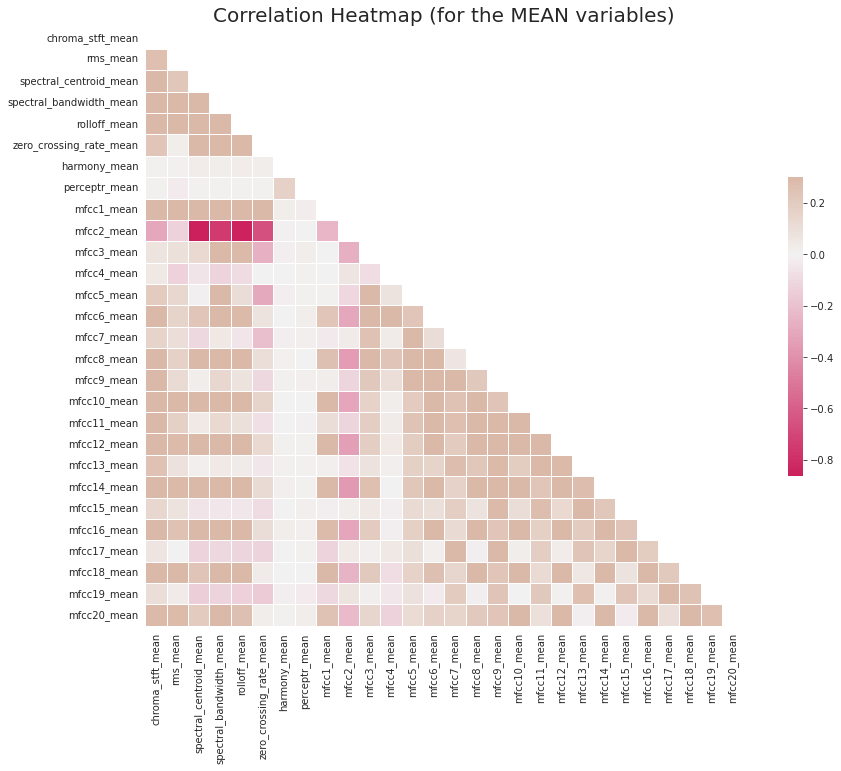

In [13]:
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

Text(0, 0.5, 'BPM')

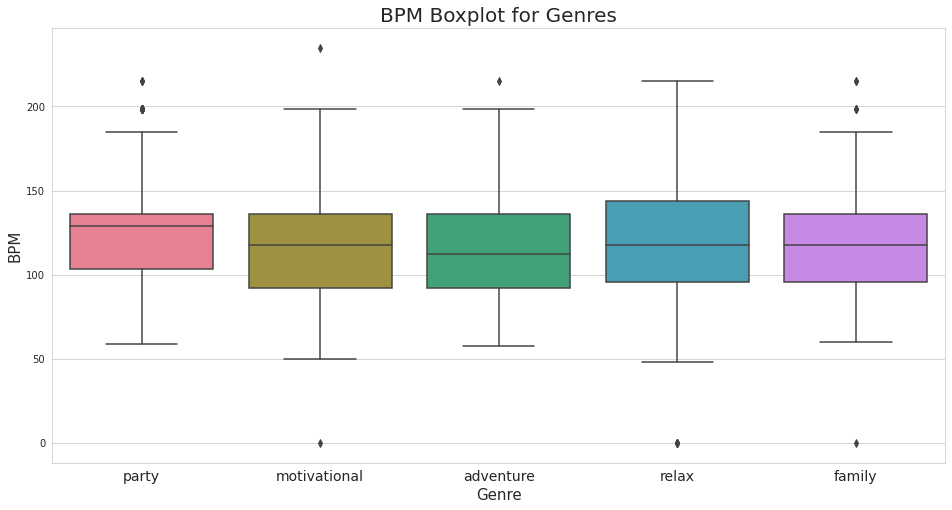

In [14]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)

Text(0, 0.5, 'Principal Component 2')

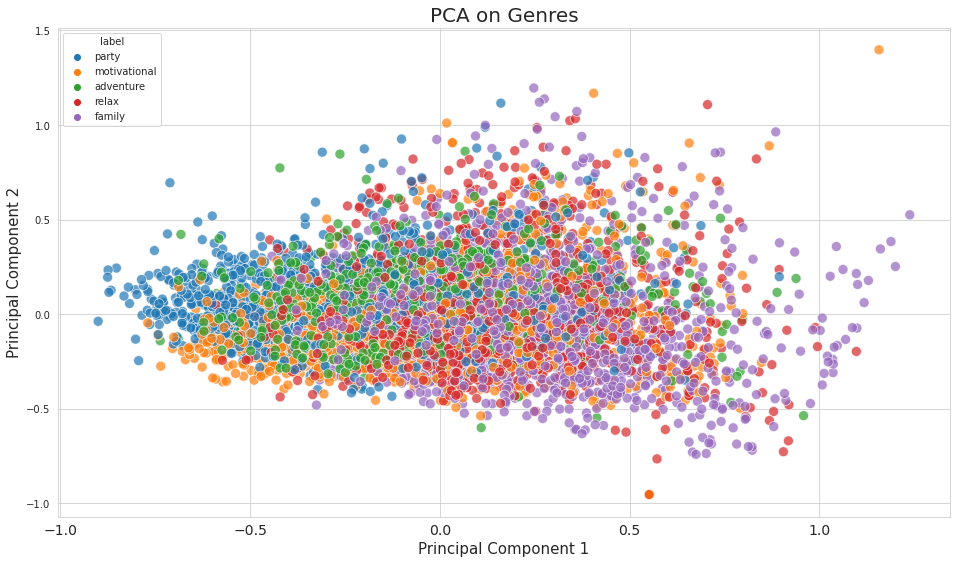

In [15]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.iloc[:, 1:-2]

#normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)

# Data Preparation

- Treat missing values.
- Outlier Treatment
- Define dummy variables for categorical variables.

## Missing Value Treatment

In [16]:
# find all columns with any NA values
print("Columns with NA values are",list(df.columns[df.isnull().any()]))

Columns with NA values are []


`No null values in the dataset`



`There are no categorical variable as such. Hence, Dummy variable creation is not needed.`

## Encode Genre Label

In [17]:
# map labels to index
label_index = dict()
index_label = dict()
for i, x in enumerate(df.label.unique()):
    label_index[x] = i
    index_label[i] = x
print(label_index)
print(index_label)

{'party': 0, 'motivational': 1, 'adventure': 2, 'relax': 3, 'family': 4}
{0: 'party', 1: 'motivational', 2: 'adventure', 3: 'relax', 4: 'family'}


In [18]:
# update labels in df to index
df.label = [label_index[l] for l in df.label]

# Split Train, Dev & Test Sets

In [19]:
# shuffle samples
df_shuffle = df.sample(frac=1, random_state=seed).reset_index(drop=True)

In [20]:
df_shuffle

,Unnamed: 0,song_name,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,language
0,602,tamil_relax124.mp3,0.260331,0.085794,0.257891,0.003352,2327.288310,316034.772088,2484.028487,90102.852915,...,-5.415373,94.720780,-0.190057,81.437840,-7.897176,76.291340,-0.086671,113.448120,3,tamil
1,5497,hindi_adventure090.mp3,0.456733,0.086322,0.240407,0.010020,2803.349300,582212.234345,2653.788704,163141.648618,...,-4.655736,60.763560,7.863175,64.562195,-0.634369,54.910950,11.817035,78.189010,2,hindi
2,290,tamil_adventure099.mp3,0.346673,0.084018,0.239971,0.004152,2479.182114,236862.556733,2718.804122,64062.899007,...,-5.235490,63.557022,0.680963,41.208965,-8.704568,57.789270,-0.686372,66.995575,2,tamil
3,1099,telugu_motivational156.mp3,0.395734,0.088662,0.165918,0.004106,2894.613754,663688.807675,2758.251288,80632.689989,...,-4.348892,43.538628,1.453314,37.121506,-6.227324,46.038680,0.248024,68.650986,1,telugu
4,1743,malayalam_adventure066.mp3,0.416859,0.080611,0.157734,0.002879,2755.748879,308731.345753,2963.771121,47959.199539,...,-2.403758,36.728844,3.793728,40.757430,-1.314179,48.041817,1.738776,36.129166,2,malayalam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6526,3714,english_relax098.mp3,0.330458,0.083980,0.070654,0.000617,1617.241936,206232.086163,2022.866090,159377.065062,...,-8.349803,68.315260,3.693350,71.152054,-1.470519,53.764744,4.010430,41.170166,3,english
6527,3325,english_motivational217.mp3,0.514912,0.076861,0.269126,0.004972,2255.696589,475464.050770,2540.378805,177221.333006,...,-8.053847,38.391090,5.736175,38.457798,-5.642301,40.559120,5.778156,48.353620,1,english
6528,1414,malayalam_party162.mp3,0.357907,0.091050,0.142572,0.001988,2416.081961,334107.871984,2429.590254,86025.991919,...,-4.968359,68.754776,6.461238,67.221940,-5.595064,86.254230,-8.802611,71.365340,0,malayalam
6529,5787,hindi_relax051.mp3,0.269846,0.092153,0.233546,0.007849,1710.155096,360859.559783,2158.223847,188205.802677,...,-8.720984,61.888725,4.924609,78.728294,-14.130875,96.944060,-3.268179,71.632550,3,hindi


In [21]:
# remove irrelevant columns
df_shuffle

# df_shuffle.drop(['filename', 'length'], axis=1, inplace=True)
df_X = df_shuffle.iloc[:,2:-1]
df_y = df_X.pop('label')


# split into train dev and test
X_train, df_test_valid_X, y_train, df_test_valid_y = skms.train_test_split(df_X, df_y, train_size=0.7, random_state=seed, stratify=df_y)
X_dev, X_test, y_dev, y_test = skms.train_test_split(df_test_valid_X, df_test_valid_y, train_size=0.66, random_state=seed, stratify=df_test_valid_y)

In [22]:
print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Dev set has {X_dev.shape[0]} records out of {len(df_shuffle)} which is {round(X_dev.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")

Train set has 4571 records out of 6531 which is 70%
Dev set has 1293 records out of 6531 which is 20%
Test set has 667 records out of 6531 which is 10%


In [23]:
print(y_train.value_counts()[0]/y_train.shape[0]*100)
print(y_dev.value_counts()[0]/y_dev.shape[0]*100)
print(y_test.value_counts()[0]/y_test.shape[0]*100)

22.92714942025815
22.96983758700696
22.938530734632685


## Scale the Features - Need to do to incoming new data as well.

In [24]:
scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_dev = pd.DataFrame(scaler.transform(X_dev), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Model Building

In [25]:
import tensorflow as tf
print("TF version:-", tf.__version__)
import keras as k
tf.random.set_seed(seed)

2022-07-08 10:41:33.886356: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-08 10:41:33.916344: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-08 10:41:33.916371: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


TF version:- 2.9.1


In [26]:
ACCURACY_THRESHOLD = 0.94

class myCallback(k.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

def trainModel(model, epochs, optimizer):
    batch_size = 128
    callback = myCallback()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_dev, y_dev), epochs=epochs, 
                     batch_size=batch_size, callbacks=[callback])

def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()


In [27]:
print(X_train.head())

   chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0          0.433118         0.023145 -0.633349 -0.506713   
1          1.086214        -0.506746 -0.545848 -0.842182   
2         -0.379111         0.482819 -1.235518 -1.029128   
3          0.447435        -0.101233 -0.669197 -0.543166   
4         -1.223309        -0.213193 -0.884696 -1.071001   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1.019381               0.115699                 0.521348   
1               -0.167526               0.199667                -0.057013   
2               -0.499970              -0.368923                -0.322539   
3                0.963552              -0.373585                 0.551116   
4               -0.854419              -1.155872                -2.530754   

   spectral_bandwidth_var  rolloff_mean  rolloff_var  ...  mfcc16_mean  \
0                0.161505      0.771735     0.323832  ...    -1.982276   
1                0.039486   

In [28]:
model_1 = k.models.Sequential([
    k.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dense(5, activation='softmax'),
])
print(model_1.summary())
model_1_history = trainModel(model=model_1, epochs=70, optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               14848     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 56,325
Trainable params: 56,325
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/70


2022-07-08 10:41:35.974984: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-08 10:41:35.975092: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-08 10:41:35.975128: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (myelin-ThinkPad-E15-Gen-2): /proc/driver/nvidia/version does not exist
2022-07-08 10:41:35.977092: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


36/36 [==============================] - 1s 5ms/step - loss: 1.3392 - accuracy: 0.4439 - val_loss: 1.1918 - val_accuracy: 0.5375
Epoch 2/70
36/36 [==============================] - 0s 2ms/step - loss: 1.0647 - accuracy: 0.5850 - val_loss: 1.0430 - val_accuracy: 0.5909
Epoch 3/70
36/36 [==============================] - 0s 2ms/step - loss: 0.9238 - accuracy: 0.6511 - val_loss: 0.9687 - val_accuracy: 0.6326
Epoch 4/70
36/36 [==============================] - 0s 2ms/step - loss: 0.8213 - accuracy: 0.6937 - val_loss: 0.9078 - val_accuracy: 0.6566
Epoch 5/70
36/36 [==============================] - 0s 2ms/step - loss: 0.7326 - accuracy: 0.7327 - val_loss: 0.8687 - val_accuracy: 0.6759
Epoch 6/70
36/36 [==============================] - 0s 3ms/step - loss: 0.6532 - accuracy: 0.7666 - val_loss: 0.8515 - val_accuracy: 0.6798
Epoch 7/70
36/36 [==============================] - 0s 2ms/step - loss: 0.5855 - accuracy: 0.7924 - val_loss: 0.8499 - val_accuracy: 0.6976
Epoch 8/70
36/36 [=============

36/36 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.9998 - val_loss: 1.3697 - val_accuracy: 0.7688
Epoch 60/70
36/36 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 1.3853 - val_accuracy: 0.7657
Epoch 61/70
36/36 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 1.3862 - val_accuracy: 0.7672
Epoch 62/70
36/36 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 1.4044 - val_accuracy: 0.7633
Epoch 63/70
36/36 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 1.4128 - val_accuracy: 0.7610
Epoch 64/70
36/36 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9996 - val_loss: 1.4066 - val_accuracy: 0.7680
Epoch 65/70
36/36 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 1.4271 - val_accuracy: 0.7649
Epoch 66/70
36/36 [======

Max. Validation Accuracy 0.7703016400337219


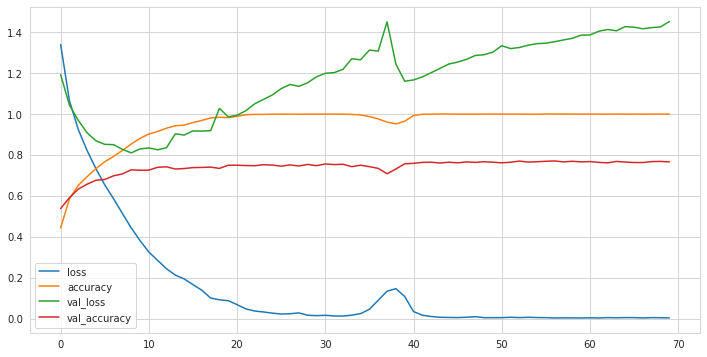

In [29]:
plotHistory(model_1_history)

In [30]:
model_2 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(5, activation='softmax'),
])
print(model_2.summary())
model_2_history = trainModel(model=model_2, epochs=100, optimizer='adam')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               29696     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)               

36/36 [==============================] - 0s 4ms/step - loss: 0.0946 - accuracy: 0.9692 - val_loss: 0.9033 - val_accuracy: 0.7804
Epoch 48/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1116 - accuracy: 0.9639 - val_loss: 0.8666 - val_accuracy: 0.7927
Epoch 49/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0944 - accuracy: 0.9702 - val_loss: 0.8733 - val_accuracy: 0.7966
Epoch 50/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0876 - accuracy: 0.9700 - val_loss: 0.9133 - val_accuracy: 0.7873
Epoch 51/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0880 - accuracy: 0.9700 - val_loss: 0.8594 - val_accuracy: 0.8020
Epoch 52/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0951 - accuracy: 0.9685 - val_loss: 0.8530 - val_accuracy: 0.7989
Epoch 53/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0973 - accuracy: 0.9696 - val_loss: 0.8193 - val_accuracy: 0.8082
Epoch 54/100
36/36 

Max. Validation Accuracy 0.8120649456977844


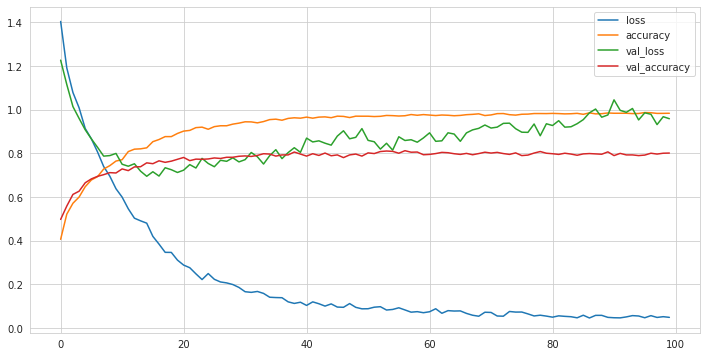

In [31]:
plotHistory(model_2_history)

In [32]:
model_3 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(5, activation='softmax'),
])
print(model_3.summary())
model_3_history = trainModel(model=model_3, epochs=700, optimizer='sgd')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               29696     
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)               

36/36 [==============================] - 0s 4ms/step - loss: 1.0934 - accuracy: 0.5732 - val_loss: 1.0547 - val_accuracy: 0.5770
Epoch 48/700
36/36 [==============================] - 0s 4ms/step - loss: 1.0990 - accuracy: 0.5684 - val_loss: 1.0493 - val_accuracy: 0.5886
Epoch 49/700
36/36 [==============================] - 0s 4ms/step - loss: 1.0837 - accuracy: 0.5800 - val_loss: 1.0451 - val_accuracy: 0.5862
Epoch 50/700
36/36 [==============================] - 0s 4ms/step - loss: 1.0906 - accuracy: 0.5690 - val_loss: 1.0410 - val_accuracy: 0.5839
Epoch 51/700
36/36 [==============================] - 0s 4ms/step - loss: 1.0805 - accuracy: 0.5751 - val_loss: 1.0358 - val_accuracy: 0.5878
Epoch 52/700
36/36 [==============================] - 0s 4ms/step - loss: 1.0898 - accuracy: 0.5758 - val_loss: 1.0326 - val_accuracy: 0.5932
Epoch 53/700
36/36 [==============================] - 0s 4ms/step - loss: 1.0638 - accuracy: 0.5850 - val_loss: 1.0282 - val_accuracy: 0.5978
Epoch 54/700
36/36 

Epoch 105/700
36/36 [==============================] - 0s 4ms/step - loss: 0.8583 - accuracy: 0.6767 - val_loss: 0.8655 - val_accuracy: 0.6721
Epoch 106/700
36/36 [==============================] - 0s 4ms/step - loss: 0.8475 - accuracy: 0.6714 - val_loss: 0.8630 - val_accuracy: 0.6759
Epoch 107/700
36/36 [==============================] - 0s 4ms/step - loss: 0.8485 - accuracy: 0.6806 - val_loss: 0.8625 - val_accuracy: 0.6705
Epoch 108/700
36/36 [==============================] - 0s 4ms/step - loss: 0.8562 - accuracy: 0.6740 - val_loss: 0.8588 - val_accuracy: 0.6744
Epoch 109/700
36/36 [==============================] - 0s 4ms/step - loss: 0.8381 - accuracy: 0.6804 - val_loss: 0.8560 - val_accuracy: 0.6798
Epoch 110/700
36/36 [==============================] - 0s 4ms/step - loss: 0.8517 - accuracy: 0.6718 - val_loss: 0.8542 - val_accuracy: 0.6814
Epoch 111/700
36/36 [==============================] - 0s 4ms/step - loss: 0.8340 - accuracy: 0.6823 - val_loss: 0.8514 - val_accuracy: 0.6767

36/36 [==============================] - 0s 4ms/step - loss: 0.6604 - accuracy: 0.7596 - val_loss: 0.7666 - val_accuracy: 0.7077
Epoch 163/700
36/36 [==============================] - 0s 4ms/step - loss: 0.6589 - accuracy: 0.7600 - val_loss: 0.7630 - val_accuracy: 0.7108
Epoch 164/700
36/36 [==============================] - 0s 4ms/step - loss: 0.6712 - accuracy: 0.7434 - val_loss: 0.7584 - val_accuracy: 0.7084
Epoch 165/700
36/36 [==============================] - 0s 4ms/step - loss: 0.6565 - accuracy: 0.7528 - val_loss: 0.7598 - val_accuracy: 0.7115
Epoch 166/700
36/36 [==============================] - 0s 4ms/step - loss: 0.6656 - accuracy: 0.7532 - val_loss: 0.7569 - val_accuracy: 0.7092
Epoch 167/700
36/36 [==============================] - 0s 4ms/step - loss: 0.6540 - accuracy: 0.7596 - val_loss: 0.7552 - val_accuracy: 0.7138
Epoch 168/700
36/36 [==============================] - 0s 4ms/step - loss: 0.6462 - accuracy: 0.7615 - val_loss: 0.7566 - val_accuracy: 0.7077
Epoch 169/700

36/36 [==============================] - 0s 4ms/step - loss: 0.4908 - accuracy: 0.8186 - val_loss: 0.7082 - val_accuracy: 0.7440
Epoch 220/700
36/36 [==============================] - 0s 4ms/step - loss: 0.5034 - accuracy: 0.8206 - val_loss: 0.7070 - val_accuracy: 0.7448
Epoch 221/700
36/36 [==============================] - 0s 4ms/step - loss: 0.4889 - accuracy: 0.8263 - val_loss: 0.7078 - val_accuracy: 0.7432
Epoch 222/700
36/36 [==============================] - 0s 4ms/step - loss: 0.4823 - accuracy: 0.8285 - val_loss: 0.7109 - val_accuracy: 0.7471
Epoch 223/700
36/36 [==============================] - 0s 4ms/step - loss: 0.4904 - accuracy: 0.8239 - val_loss: 0.7102 - val_accuracy: 0.7471
Epoch 224/700
36/36 [==============================] - 0s 4ms/step - loss: 0.4850 - accuracy: 0.8186 - val_loss: 0.7082 - val_accuracy: 0.7479
Epoch 225/700
36/36 [==============================] - 0s 4ms/step - loss: 0.4853 - accuracy: 0.8265 - val_loss: 0.7061 - val_accuracy: 0.7502
Epoch 226/700

36/36 [==============================] - 0s 4ms/step - loss: 0.3713 - accuracy: 0.8600 - val_loss: 0.6916 - val_accuracy: 0.7641
Epoch 277/700
36/36 [==============================] - 0s 4ms/step - loss: 0.3462 - accuracy: 0.8779 - val_loss: 0.6924 - val_accuracy: 0.7602
Epoch 278/700
36/36 [==============================] - 0s 4ms/step - loss: 0.3555 - accuracy: 0.8731 - val_loss: 0.6927 - val_accuracy: 0.7649
Epoch 279/700
36/36 [==============================] - 0s 4ms/step - loss: 0.3526 - accuracy: 0.8685 - val_loss: 0.6907 - val_accuracy: 0.7657
Epoch 280/700
36/36 [==============================] - 0s 4ms/step - loss: 0.3381 - accuracy: 0.8812 - val_loss: 0.6972 - val_accuracy: 0.7672
Epoch 281/700
36/36 [==============================] - 0s 5ms/step - loss: 0.3555 - accuracy: 0.8711 - val_loss: 0.6916 - val_accuracy: 0.7680
Epoch 282/700
36/36 [==============================] - 0s 5ms/step - loss: 0.3444 - accuracy: 0.8764 - val_loss: 0.6938 - val_accuracy: 0.7695
Epoch 283/700

36/36 [==============================] - 0s 4ms/step - loss: 0.2536 - accuracy: 0.9110 - val_loss: 0.7106 - val_accuracy: 0.7749
Epoch 334/700
36/36 [==============================] - 0s 4ms/step - loss: 0.2661 - accuracy: 0.9112 - val_loss: 0.7065 - val_accuracy: 0.7734
Epoch 335/700
36/36 [==============================] - 0s 4ms/step - loss: 0.2561 - accuracy: 0.9077 - val_loss: 0.7109 - val_accuracy: 0.7757
Epoch 336/700
36/36 [==============================] - 0s 4ms/step - loss: 0.2620 - accuracy: 0.9042 - val_loss: 0.7072 - val_accuracy: 0.7734
Epoch 337/700
36/36 [==============================] - 0s 4ms/step - loss: 0.2571 - accuracy: 0.9057 - val_loss: 0.7006 - val_accuracy: 0.7819
Epoch 338/700
36/36 [==============================] - 0s 4ms/step - loss: 0.2522 - accuracy: 0.9166 - val_loss: 0.7085 - val_accuracy: 0.7765
Epoch 339/700
36/36 [==============================] - 0s 4ms/step - loss: 0.2498 - accuracy: 0.9175 - val_loss: 0.7058 - val_accuracy: 0.7819
Epoch 340/700

36/36 [==============================] - 0s 4ms/step - loss: 0.1794 - accuracy: 0.9374 - val_loss: 0.7268 - val_accuracy: 0.7850
Epoch 391/700
36/36 [==============================] - 0s 4ms/step - loss: 0.2018 - accuracy: 0.9274 - val_loss: 0.7275 - val_accuracy: 0.7834
Epoch 392/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1911 - accuracy: 0.9350 - val_loss: 0.7203 - val_accuracy: 0.7796
Epoch 393/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1815 - accuracy: 0.9359 - val_loss: 0.7229 - val_accuracy: 0.7804
Epoch 394/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1868 - accuracy: 0.9357 - val_loss: 0.7242 - val_accuracy: 0.7827
Epoch 395/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1775 - accuracy: 0.9390 - val_loss: 0.7234 - val_accuracy: 0.7896
Epoch 396/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1812 - accuracy: 0.9407 - val_loss: 0.7216 - val_accuracy: 0.7935
Epoch 397/700

36/36 [==============================] - 0s 4ms/step - loss: 0.1501 - accuracy: 0.9482 - val_loss: 0.7516 - val_accuracy: 0.7850
Epoch 448/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1403 - accuracy: 0.9521 - val_loss: 0.7525 - val_accuracy: 0.7827
Epoch 449/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1535 - accuracy: 0.9453 - val_loss: 0.7527 - val_accuracy: 0.7850
Epoch 450/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1488 - accuracy: 0.9508 - val_loss: 0.7470 - val_accuracy: 0.7858
Epoch 451/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1455 - accuracy: 0.9532 - val_loss: 0.7491 - val_accuracy: 0.7858
Epoch 452/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1466 - accuracy: 0.9532 - val_loss: 0.7471 - val_accuracy: 0.7858
Epoch 453/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1425 - accuracy: 0.9514 - val_loss: 0.7502 - val_accuracy: 0.7920
Epoch 454/700

36/36 [==============================] - 0s 3ms/step - loss: 0.1160 - accuracy: 0.9584 - val_loss: 0.7639 - val_accuracy: 0.7889
Epoch 505/700
36/36 [==============================] - 0s 3ms/step - loss: 0.1133 - accuracy: 0.9611 - val_loss: 0.7638 - val_accuracy: 0.7904
Epoch 506/700
36/36 [==============================] - 0s 3ms/step - loss: 0.1113 - accuracy: 0.9604 - val_loss: 0.7673 - val_accuracy: 0.7912
Epoch 507/700
36/36 [==============================] - 0s 3ms/step - loss: 0.1088 - accuracy: 0.9665 - val_loss: 0.7624 - val_accuracy: 0.7935
Epoch 508/700
36/36 [==============================] - 0s 3ms/step - loss: 0.1161 - accuracy: 0.9602 - val_loss: 0.7670 - val_accuracy: 0.7881
Epoch 509/700
36/36 [==============================] - 0s 3ms/step - loss: 0.1170 - accuracy: 0.9608 - val_loss: 0.7637 - val_accuracy: 0.7873
Epoch 510/700
36/36 [==============================] - 0s 3ms/step - loss: 0.1161 - accuracy: 0.9628 - val_loss: 0.7559 - val_accuracy: 0.7935
Epoch 511/700

36/36 [==============================] - 0s 3ms/step - loss: 0.0856 - accuracy: 0.9720 - val_loss: 0.8051 - val_accuracy: 0.7920
Epoch 562/700
36/36 [==============================] - 0s 3ms/step - loss: 0.0796 - accuracy: 0.9737 - val_loss: 0.8040 - val_accuracy: 0.7966
Epoch 563/700
36/36 [==============================] - 0s 4ms/step - loss: 0.0844 - accuracy: 0.9737 - val_loss: 0.8073 - val_accuracy: 0.7904
Epoch 564/700
36/36 [==============================] - 0s 3ms/step - loss: 0.0863 - accuracy: 0.9707 - val_loss: 0.8127 - val_accuracy: 0.7889
Epoch 565/700
36/36 [==============================] - 0s 3ms/step - loss: 0.0958 - accuracy: 0.9667 - val_loss: 0.8127 - val_accuracy: 0.7943
Epoch 566/700
36/36 [==============================] - 0s 3ms/step - loss: 0.0880 - accuracy: 0.9713 - val_loss: 0.8073 - val_accuracy: 0.8012
Epoch 567/700
36/36 [==============================] - 0s 3ms/step - loss: 0.0882 - accuracy: 0.9709 - val_loss: 0.8167 - val_accuracy: 0.7966
Epoch 568/700

36/36 [==============================] - 0s 3ms/step - loss: 0.0726 - accuracy: 0.9781 - val_loss: 0.8232 - val_accuracy: 0.7966
Epoch 619/700
36/36 [==============================] - 0s 3ms/step - loss: 0.0718 - accuracy: 0.9779 - val_loss: 0.8317 - val_accuracy: 0.8005
Epoch 620/700
36/36 [==============================] - 0s 3ms/step - loss: 0.0817 - accuracy: 0.9720 - val_loss: 0.8253 - val_accuracy: 0.8028
Epoch 621/700
36/36 [==============================] - 0s 3ms/step - loss: 0.0753 - accuracy: 0.9759 - val_loss: 0.8270 - val_accuracy: 0.7974
Epoch 622/700
36/36 [==============================] - 0s 3ms/step - loss: 0.0700 - accuracy: 0.9786 - val_loss: 0.8213 - val_accuracy: 0.7966
Epoch 623/700
36/36 [==============================] - 0s 3ms/step - loss: 0.0733 - accuracy: 0.9770 - val_loss: 0.8218 - val_accuracy: 0.7951
Epoch 624/700
36/36 [==============================] - 0s 3ms/step - loss: 0.0755 - accuracy: 0.9770 - val_loss: 0.8163 - val_accuracy: 0.7974
Epoch 625/700

36/36 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9807 - val_loss: 0.8460 - val_accuracy: 0.8036
Epoch 676/700
36/36 [==============================] - 0s 3ms/step - loss: 0.0671 - accuracy: 0.9794 - val_loss: 0.8391 - val_accuracy: 0.8005
Epoch 677/700
36/36 [==============================] - 0s 3ms/step - loss: 0.0645 - accuracy: 0.9797 - val_loss: 0.8434 - val_accuracy: 0.8051
Epoch 678/700
36/36 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9834 - val_loss: 0.8469 - val_accuracy: 0.7997
Epoch 679/700
36/36 [==============================] - 0s 3ms/step - loss: 0.0631 - accuracy: 0.9792 - val_loss: 0.8449 - val_accuracy: 0.8020
Epoch 680/700
36/36 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.9836 - val_loss: 0.8388 - val_accuracy: 0.7989
Epoch 681/700
36/36 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9814 - val_loss: 0.8478 - val_accuracy: 0.8051
Epoch 682/700

Max. Validation Accuracy 0.8051044344902039


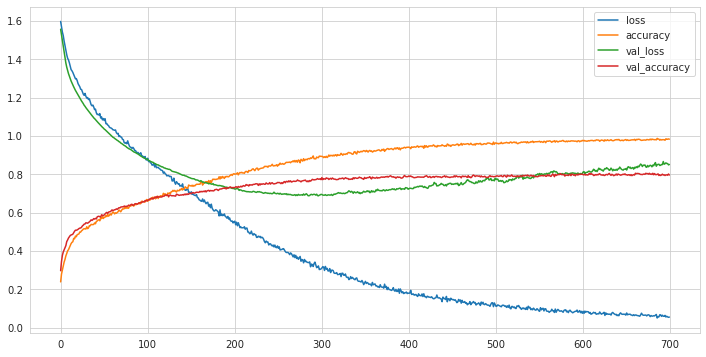

In [33]:
plotHistory(model_3_history)

In [34]:
print(X_train.shape[1])

57


In [35]:
model_4 = k.models.Sequential([
    k.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.3),
    
    k.layers.Dense(512, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(5, activation='softmax'),
])
print(model_4.summary())
model_4_history = trainModel(model=model_4, epochs=500, optimizer='rmsprop')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1024)              59392     
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_15 (Dense)            (None, 512)               524800    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)              

36/36 [==============================] - 0s 9ms/step - loss: 0.1532 - accuracy: 0.9519 - val_loss: 0.9010 - val_accuracy: 0.7904
Epoch 46/500
36/36 [==============================] - 0s 8ms/step - loss: 0.1384 - accuracy: 0.9593 - val_loss: 0.9071 - val_accuracy: 0.8005
Epoch 47/500
36/36 [==============================] - 0s 8ms/step - loss: 0.1276 - accuracy: 0.9587 - val_loss: 0.9074 - val_accuracy: 0.7819
Epoch 48/500
36/36 [==============================] - 0s 9ms/step - loss: 0.1357 - accuracy: 0.9580 - val_loss: 0.9356 - val_accuracy: 0.7804
Epoch 49/500
36/36 [==============================] - 0s 9ms/step - loss: 0.1364 - accuracy: 0.9582 - val_loss: 1.0480 - val_accuracy: 0.7842
Epoch 50/500
36/36 [==============================] - 0s 9ms/step - loss: 0.1345 - accuracy: 0.9584 - val_loss: 1.1028 - val_accuracy: 0.7842
Epoch 51/500
36/36 [==============================] - 0s 8ms/step - loss: 0.1047 - accuracy: 0.9702 - val_loss: 1.0996 - val_accuracy: 0.7773
Epoch 52/500
36/36 

36/36 [==============================] - 0s 9ms/step - loss: 0.0747 - accuracy: 0.9797 - val_loss: 1.3373 - val_accuracy: 0.8059
Epoch 103/500
36/36 [==============================] - 0s 9ms/step - loss: 0.0653 - accuracy: 0.9856 - val_loss: 1.4368 - val_accuracy: 0.7935
Epoch 104/500
36/36 [==============================] - 0s 9ms/step - loss: 0.0673 - accuracy: 0.9823 - val_loss: 1.3577 - val_accuracy: 0.7927
Epoch 105/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0667 - accuracy: 0.9788 - val_loss: 1.3229 - val_accuracy: 0.7912
Epoch 106/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0574 - accuracy: 0.9827 - val_loss: 1.3735 - val_accuracy: 0.7881
Epoch 107/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0657 - accuracy: 0.9807 - val_loss: 1.4010 - val_accuracy: 0.8074
Epoch 108/500
36/36 [==============================] - 0s 9ms/step - loss: 0.0629 - accuracy: 0.9838 - val_loss: 1.3382 - val_accuracy: 0.8051
Epoch 109/500

36/36 [==============================] - 0s 8ms/step - loss: 0.0551 - accuracy: 0.9860 - val_loss: 1.5075 - val_accuracy: 0.7943
Epoch 160/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0707 - accuracy: 0.9867 - val_loss: 1.3168 - val_accuracy: 0.8036
Epoch 161/500
36/36 [==============================] - 0s 8ms/step - loss: 0.1312 - accuracy: 0.9845 - val_loss: 1.4356 - val_accuracy: 0.7943
Epoch 162/500
36/36 [==============================] - 0s 9ms/step - loss: 0.0543 - accuracy: 0.9858 - val_loss: 1.4585 - val_accuracy: 0.8121
Epoch 163/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0655 - accuracy: 0.9858 - val_loss: 1.3811 - val_accuracy: 0.8105
Epoch 164/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0472 - accuracy: 0.9862 - val_loss: 1.4833 - val_accuracy: 0.8113
Epoch 165/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0637 - accuracy: 0.9882 - val_loss: 1.7047 - val_accuracy: 0.7951
Epoch 166/500

36/36 [==============================] - 0s 8ms/step - loss: 0.0414 - accuracy: 0.9899 - val_loss: 1.6380 - val_accuracy: 0.8012
Epoch 217/500
36/36 [==============================] - 0s 9ms/step - loss: 0.0546 - accuracy: 0.9864 - val_loss: 1.5753 - val_accuracy: 0.8036
Epoch 218/500
36/36 [==============================] - 0s 9ms/step - loss: 0.0510 - accuracy: 0.9895 - val_loss: 1.5450 - val_accuracy: 0.8074
Epoch 219/500
36/36 [==============================] - 0s 9ms/step - loss: 0.0643 - accuracy: 0.9869 - val_loss: 1.4325 - val_accuracy: 0.8020
Epoch 220/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0595 - accuracy: 0.9869 - val_loss: 1.4054 - val_accuracy: 0.8051
Epoch 221/500
36/36 [==============================] - 0s 9ms/step - loss: 0.0560 - accuracy: 0.9884 - val_loss: 1.4168 - val_accuracy: 0.8059
Epoch 222/500
36/36 [==============================] - 0s 9ms/step - loss: 0.0553 - accuracy: 0.9875 - val_loss: 1.6026 - val_accuracy: 0.8090
Epoch 223/500

36/36 [==============================] - 0s 9ms/step - loss: 0.0617 - accuracy: 0.9891 - val_loss: 1.3480 - val_accuracy: 0.8067
Epoch 274/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0469 - accuracy: 0.9906 - val_loss: 1.6590 - val_accuracy: 0.8121
Epoch 275/500
36/36 [==============================] - 0s 10ms/step - loss: 0.0575 - accuracy: 0.9869 - val_loss: 1.4991 - val_accuracy: 0.8175
Epoch 276/500
36/36 [==============================] - 0s 10ms/step - loss: 0.0530 - accuracy: 0.9893 - val_loss: 1.6083 - val_accuracy: 0.8144
Epoch 277/500
36/36 [==============================] - 0s 11ms/step - loss: 0.0411 - accuracy: 0.9891 - val_loss: 1.7880 - val_accuracy: 0.8144
Epoch 278/500
36/36 [==============================] - 0s 9ms/step - loss: 0.0633 - accuracy: 0.9917 - val_loss: 2.0312 - val_accuracy: 0.8059
Epoch 279/500
36/36 [==============================] - 0s 9ms/step - loss: 0.0480 - accuracy: 0.9912 - val_loss: 1.7731 - val_accuracy: 0.8051
Epoch 280/

36/36 [==============================] - 0s 8ms/step - loss: 0.0529 - accuracy: 0.9893 - val_loss: 1.8365 - val_accuracy: 0.8090
Epoch 331/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0525 - accuracy: 0.9899 - val_loss: 1.9046 - val_accuracy: 0.8082
Epoch 332/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0337 - accuracy: 0.9917 - val_loss: 2.3862 - val_accuracy: 0.8067
Epoch 333/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0641 - accuracy: 0.9897 - val_loss: 2.0129 - val_accuracy: 0.8028
Epoch 334/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0533 - accuracy: 0.9895 - val_loss: 1.8451 - val_accuracy: 0.7974
Epoch 335/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0364 - accuracy: 0.9939 - val_loss: 2.2518 - val_accuracy: 0.7981
Epoch 336/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0575 - accuracy: 0.9912 - val_loss: 2.2450 - val_accuracy: 0.8097
Epoch 337/500

36/36 [==============================] - 0s 9ms/step - loss: 0.0679 - accuracy: 0.9895 - val_loss: 2.0861 - val_accuracy: 0.8090
Epoch 388/500
36/36 [==============================] - 0s 9ms/step - loss: 0.0657 - accuracy: 0.9906 - val_loss: 1.9516 - val_accuracy: 0.8128
Epoch 389/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0435 - accuracy: 0.9908 - val_loss: 2.0493 - val_accuracy: 0.8113
Epoch 390/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0815 - accuracy: 0.9908 - val_loss: 1.8033 - val_accuracy: 0.8036
Epoch 391/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0419 - accuracy: 0.9921 - val_loss: 2.0379 - val_accuracy: 0.8074
Epoch 392/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0359 - accuracy: 0.9923 - val_loss: 2.3527 - val_accuracy: 0.8036
Epoch 393/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0643 - accuracy: 0.9906 - val_loss: 2.1779 - val_accuracy: 0.7989
Epoch 394/500

36/36 [==============================] - 0s 8ms/step - loss: 0.0457 - accuracy: 0.9906 - val_loss: 2.0450 - val_accuracy: 0.8067
Epoch 445/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0689 - accuracy: 0.9899 - val_loss: 1.9138 - val_accuracy: 0.8059
Epoch 446/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0663 - accuracy: 0.9921 - val_loss: 2.1884 - val_accuracy: 0.8020
Epoch 447/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0353 - accuracy: 0.9923 - val_loss: 2.3166 - val_accuracy: 0.8074
Epoch 448/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0560 - accuracy: 0.9906 - val_loss: 2.4018 - val_accuracy: 0.8090
Epoch 449/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0441 - accuracy: 0.9928 - val_loss: 2.4078 - val_accuracy: 0.8028
Epoch 450/500
36/36 [==============================] - 0s 8ms/step - loss: 0.0620 - accuracy: 0.9888 - val_loss: 2.2159 - val_accuracy: 0.8152
Epoch 451/500

Max. Validation Accuracy 0.8252126574516296


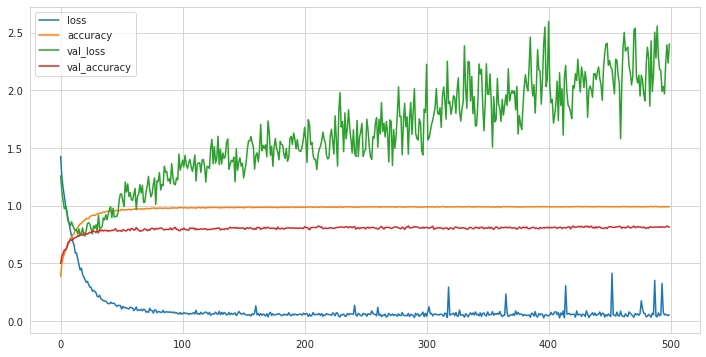

In [36]:
plotHistory(model_4_history)

# Model Evaluation

In [37]:
test_loss, test_acc  = model_4.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("\nThe Best test Accuracy is :",test_acc*100)

6/6 [==============================] - 0s 3ms/step - loss: 2.6947 - accuracy: 0.7841
The test Loss is : 2.6946616172790527

The Best test Accuracy is : 78.41079235076904


In [38]:
%%time
pred_acc = model_4.predict(X_test)

21/21 [==============================] - 0s 1ms/step
CPU times: user 127 ms, sys: 465 µs, total: 127 ms
Wall time: 117 ms


In [39]:
%%time
y_prob = model_4.predict(X_test) 
pred_labels = y_prob.argmax(axis=-1)

21/21 [==============================] - 0s 1ms/step
CPU times: user 61.5 ms, sys: 19.7 ms, total: 81.3 ms
Wall time: 60.9 ms


In [40]:
#print(len(pred_labels))
# i = 0      # test song
# display(X_test.iloc[i])
# index_label[pred_labels[i]]

In [41]:
%%time

########### TEST DATA #################


gtzan_new_test_df = pd.read_csv("../myelin_features.csv")

song_name_df = gtzan_new_test_df.iloc[:, :2]
# song_name_df
true_labels = gt_labels
# true_labels

gtzan_new_test_df = gtzan_new_test_df.iloc[:, 2:-2]

# gtzan_new_test_df
#print(gtzan_new_test_df.iloc[:, :])

gtzan_new_test_df = pd.DataFrame(scaler.transform(gtzan_new_test_df), columns=gtzan_new_test_df.columns)

#print(gtzan_new_test_df.iloc[0, :])

y_prob = model_3.predict(X_test)
pred_labels = y_prob.argmax(axis=-1)

count = 0

for i in range(1, len(pred_labels) + 1):
    if true_labels.iloc[i-1,0] == index_label[pred_labels[i-1]]:
        count+=1
print(count)
print(count/len(true_labels))

for i in range(1, len(pred_labels)+1):
    print(i, index_label[pred_labels[i-1]], "------------", true_labels.iloc[i-1, 0] , "-----", song_name_df.iloc[i-1,1])

NameError: name 'gt_labels' is not defined

In [42]:
# a = gtzan_new_test_df.to_numpy()

In [43]:
# a = a.astype(np.float32)

In [44]:
#y_prob = model_1.predict(gtzan_new_test_df)
#print(y_prob)

In [45]:
# model_4.layers[-2].output

In [46]:
# m = tf.keras.Model(inputs=model_4.inputs,outputs=model_4.layers[-2].output)

In [47]:
# m.predict(gtzan_new_test_df)

In [48]:
# m.predict(X_test)

In [49]:
pred = []

y_prob = model_3.predict(X_test)
pred_labels = y_prob.argmax(axis=-1)
for pred_lab in pred_labels:
    pred.append(index_label[pred_lab])
pred

21/21 [==============================] - 0s 759us/step


['motivational',
 'relax',
 'party',
 'motivational',
 'family',
 'party',
 'motivational',
 'relax',
 'relax',
 'party',
 'motivational',
 'family',
 'motivational',
 'motivational',
 'motivational',
 'party',
 'party',
 'relax',
 'family',
 'relax',
 'motivational',
 'motivational',
 'family',
 'adventure',
 'relax',
 'relax',
 'adventure',
 'party',
 'family',
 'party',
 'family',
 'relax',
 'motivational',
 'motivational',
 'family',
 'relax',
 'family',
 'motivational',
 'family',
 'party',
 'relax',
 'family',
 'motivational',
 'party',
 'adventure',
 'motivational',
 'motivational',
 'relax',
 'party',
 'family',
 'family',
 'motivational',
 'motivational',
 'party',
 'adventure',
 'motivational',
 'family',
 'relax',
 'motivational',
 'relax',
 'party',
 'motivational',
 'motivational',
 'family',
 'relax',
 'motivational',
 'motivational',
 'family',
 'motivational',
 'family',
 'family',
 'adventure',
 'family',
 'adventure',
 'adventure',
 'party',
 'party',
 'motivational',

In [50]:
gt_labels = []
for zz in y_test:
    gt_labels.append(index_label[zz])

gt_labels

['motivational',
 'relax',
 'party',
 'motivational',
 'family',
 'party',
 'motivational',
 'relax',
 'relax',
 'party',
 'family',
 'family',
 'motivational',
 'party',
 'party',
 'party',
 'adventure',
 'family',
 'family',
 'relax',
 'party',
 'motivational',
 'family',
 'adventure',
 'relax',
 'motivational',
 'adventure',
 'party',
 'family',
 'party',
 'motivational',
 'relax',
 'motivational',
 'party',
 'family',
 'relax',
 'family',
 'motivational',
 'family',
 'party',
 'relax',
 'family',
 'motivational',
 'party',
 'party',
 'motivational',
 'motivational',
 'relax',
 'party',
 'family',
 'family',
 'relax',
 'motivational',
 'party',
 'adventure',
 'party',
 'motivational',
 'motivational',
 'motivational',
 'relax',
 'party',
 'motivational',
 'motivational',
 'motivational',
 'motivational',
 'motivational',
 'motivational',
 'motivational',
 'motivational',
 'family',
 'family',
 'adventure',
 'family',
 'adventure',
 'adventure',
 'party',
 'party',
 'motivational',
 

In [51]:
count1 = 0
for i in range(len(pred)):
    if (gt_labels[i] == pred[i]):
        count1 +=1 

print(count1/len(pred))
    

0.7781109445277361


In [54]:
model_3.save("v1_label_model.h5")